<a href="https://colab.research.google.com/github/dtaimur/RISC-Project-TN-2023/blob/main/RISC_2023_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_1.csv to Data_1.csv
Saving Data_2.csv to Data_2.csv
Saving Data_3.csv to Data_3.csv
Saving Data_4.csv to Data_4.csv


In [3]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

combined_data = pd.DataFrame()

df1 = pd.read_csv(io.BytesIO(uploaded['Data_1.csv']))
#print(df1)
combined_data = pd.concat([df1])

df2 = pd.read_csv(io.BytesIO(uploaded['Data_2.csv']))
#print(df2)
#combined_data = pd.concat([df2])

df3 = pd.read_csv(io.BytesIO(uploaded['Data_3.csv']))
#print(df3)
combined_data = pd.concat([df3])

df4 = pd.read_csv(io.BytesIO(uploaded['Data_4.csv']))
#print(df4)
combined_data = pd.concat([df4])

#df4['Timestamp'] = pd.to_datetime(df4['Timestamp'])

# Sort the dataset based on the date column
#sorted_df = df4.sort_values('Timestamp')

# Retrieve the start date (earliest date)
#start_date = sorted_df['Timestamp'].iloc[0]

# Retrieve the end date (latest date)
#end_date = sorted_df['Timestamp'].iloc[-1]

# Print the start and end dates
#print('Start Date:', start_date)
#print('End Date:', end_date)




#print(combined_data)

#plt.scatter(combined_data['Longitude'], combined_data['Latitude'])
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.title('Location of all Provider IDs')
#plt.show()

#eps = 0.1
#min_samples = 5
#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#clusters = dbscan.fit_predict(df2[['Longitude', 'Latitude']])


#plt.scatter(df2['Longitude'], df2['Latitude'], c=clusters)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.title('DBSCAN Clustering of Provider IDs')
#plt.show()

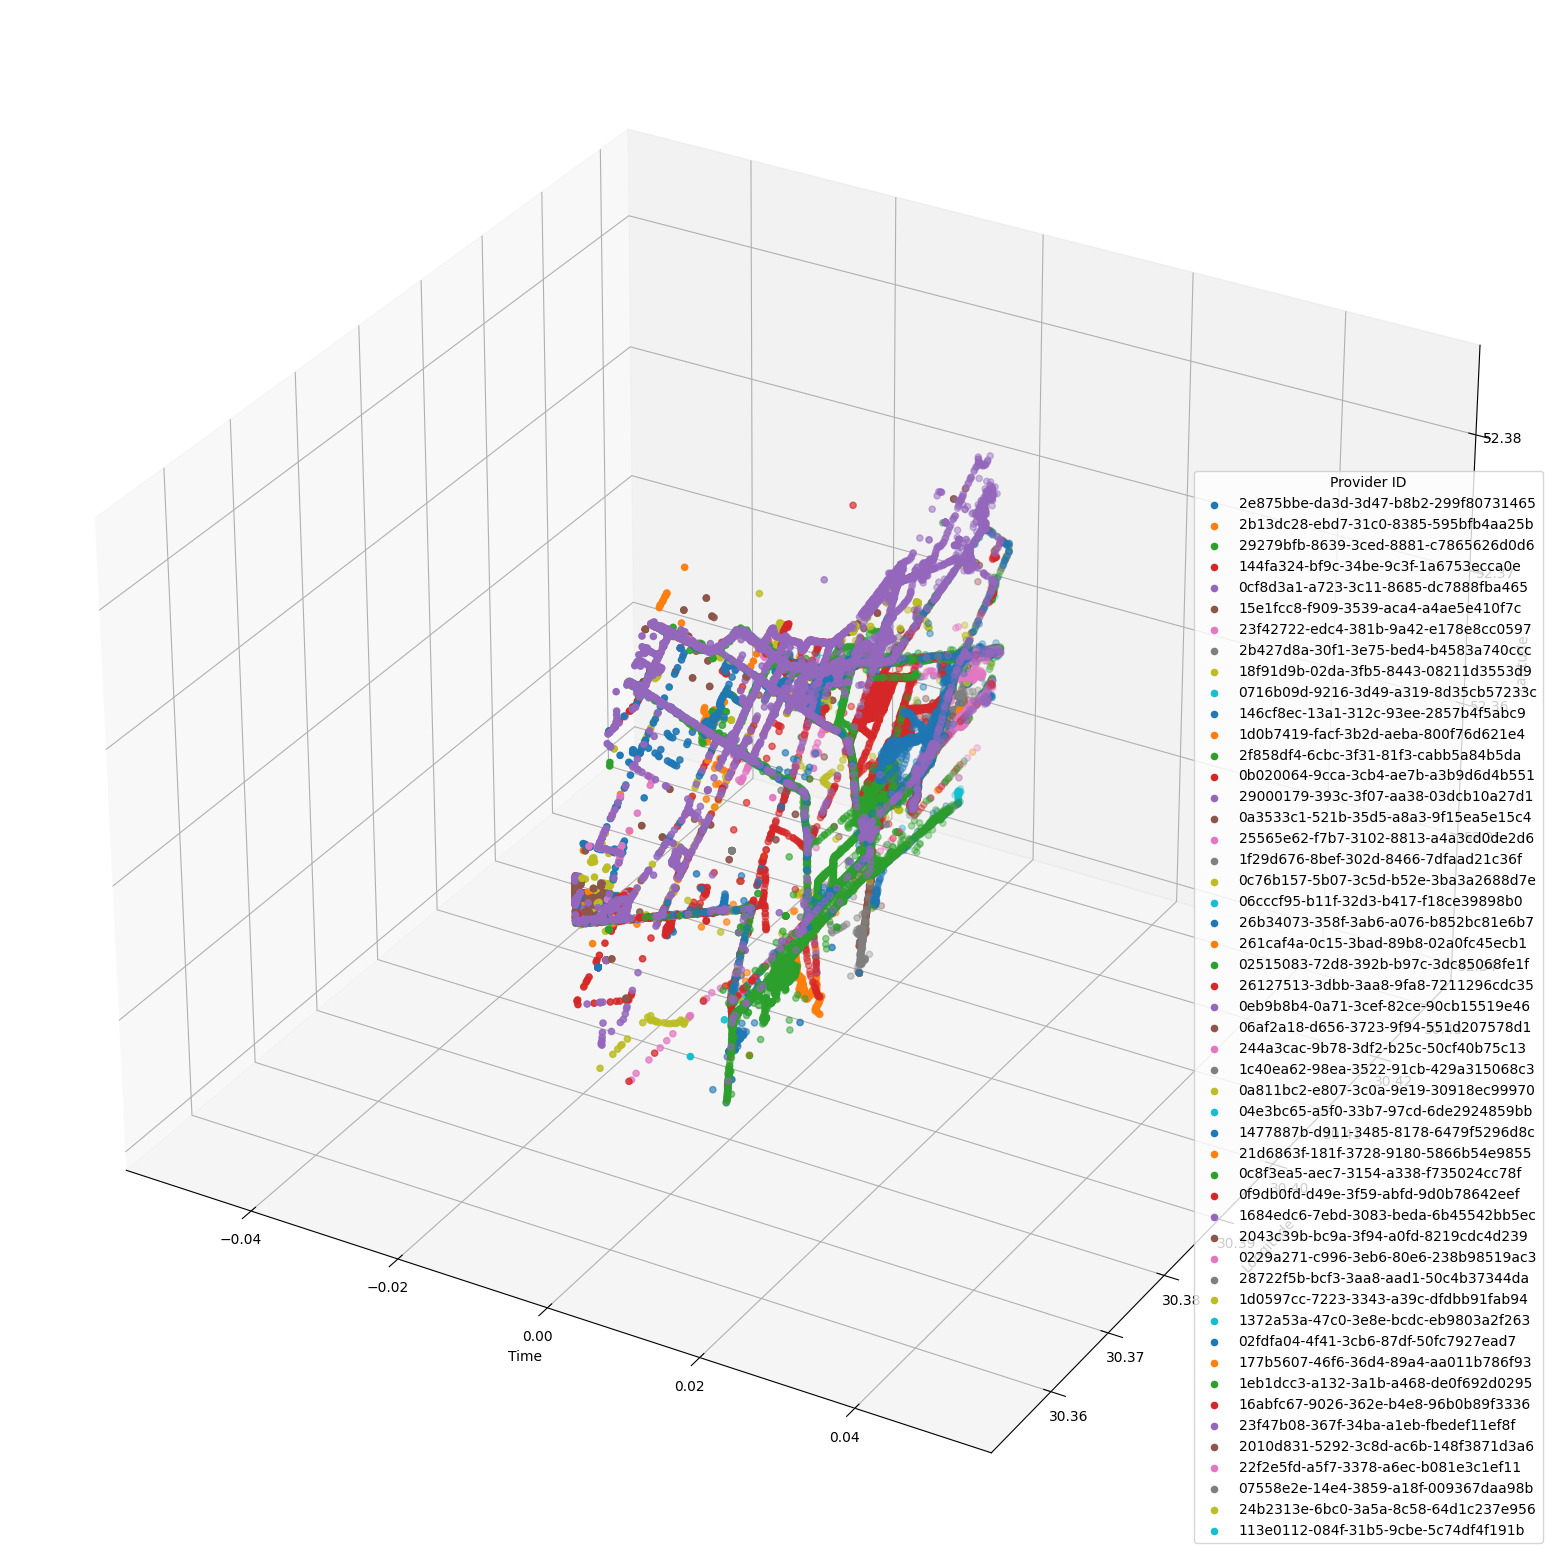

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


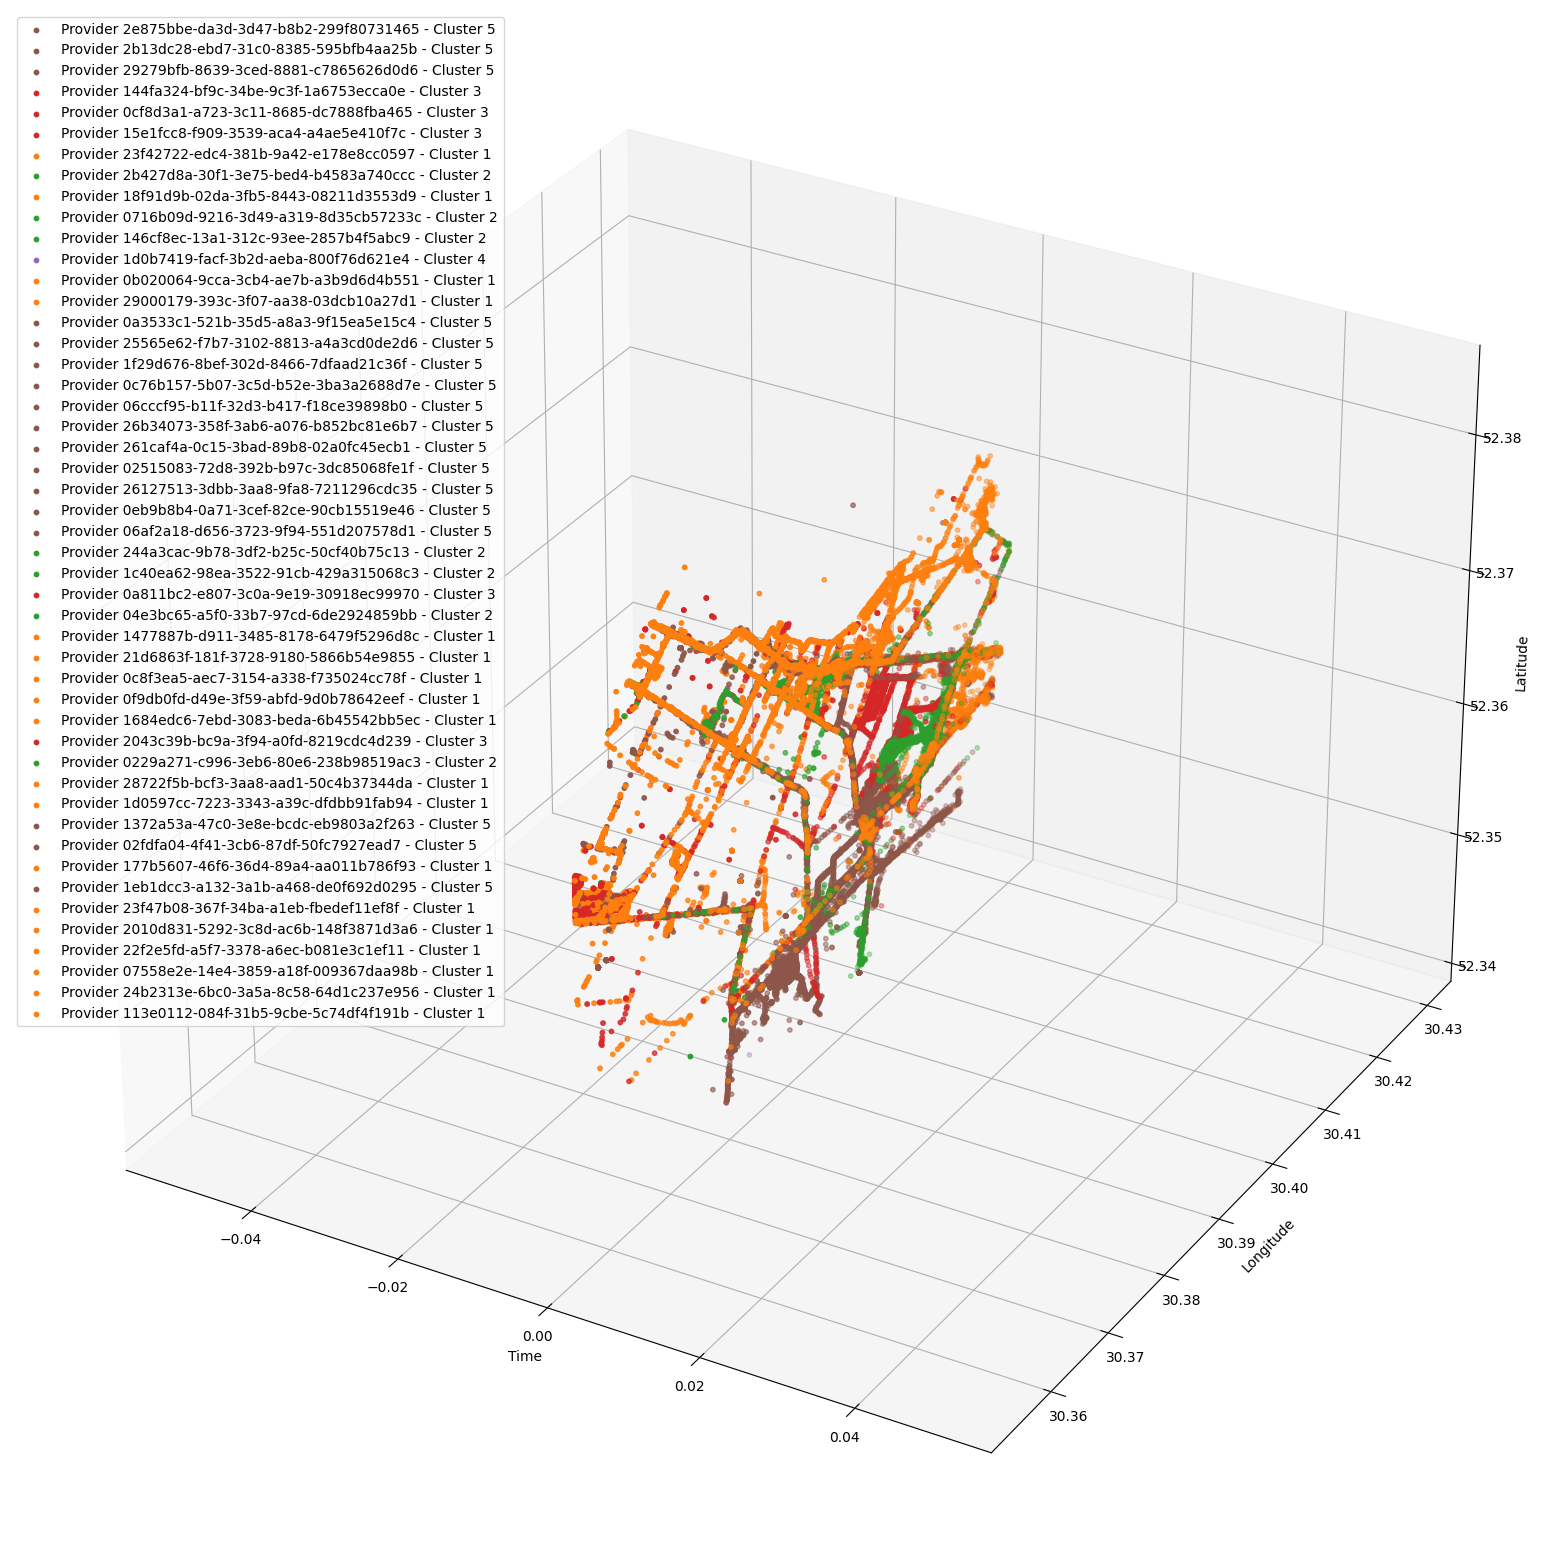

<ipython-input-7-20c91d54103a>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = labels


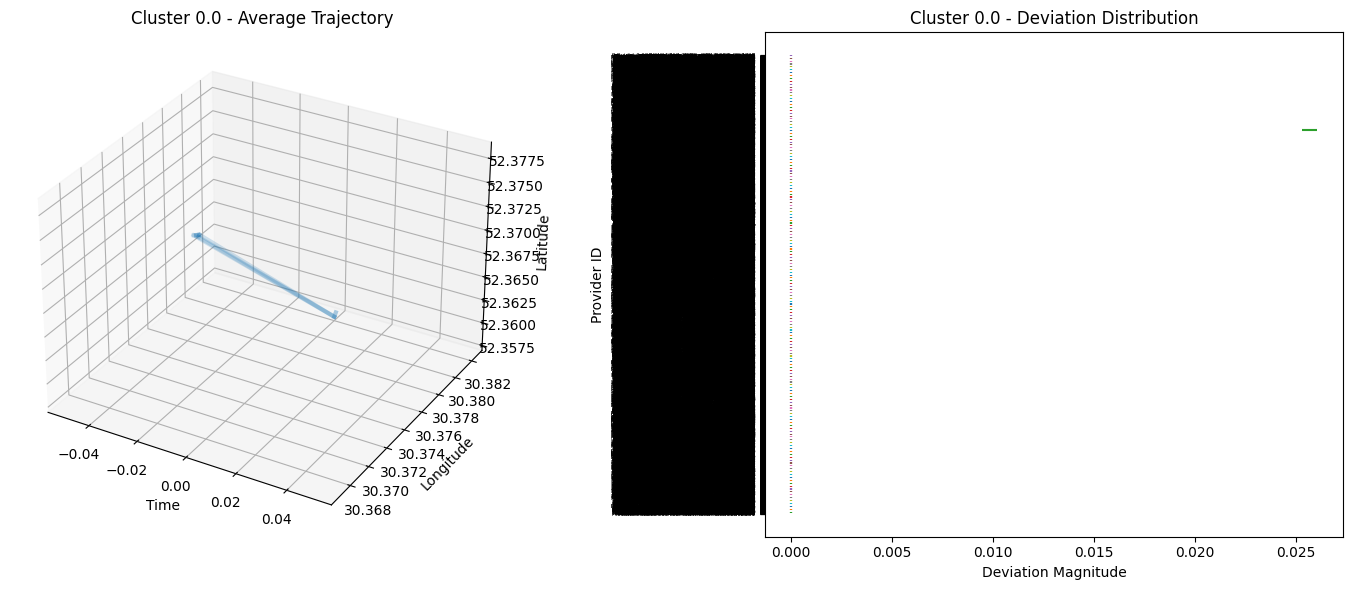

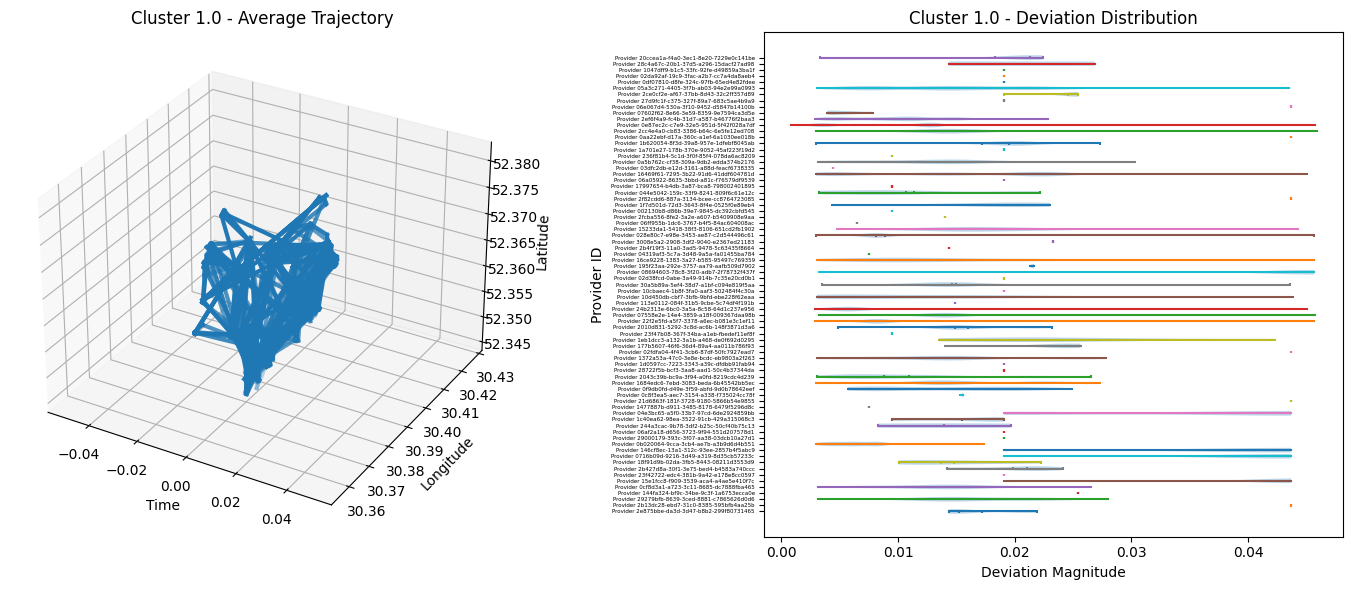

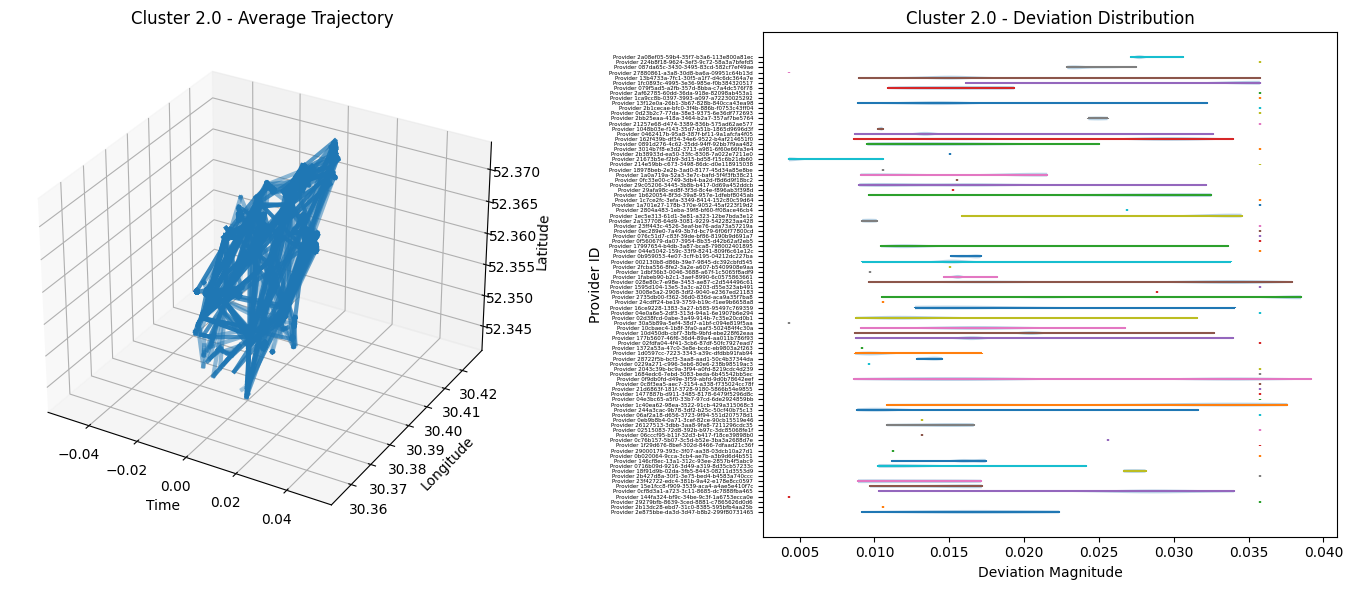

In [ ]:
#!pip install umap-learn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from datetime import datetime
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, to_rgba
from matplotlib.cm import ScalarMappable

combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'])
combined_data['Timestamp'] = combined_data['Timestamp'].astype(int) // 10**9

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')

legend_handles = []
for i, provider_id in enumerate(combined_data['Provider ID'].unique()[:50]):
    provider_data = combined_data[combined_data['Provider ID'] == provider_id]
    scatter = ax.scatter(provider_data['Timestamp'], provider_data['Longitude'], provider_data['Latitude'])
    legend_handles.append(scatter)

ax.set_xlabel('Time')
ax.set_ylabel('Longitude')
ax.set_zlabel('Latitude')

ax.legend(legend_handles, combined_data['Provider ID'].unique()[:50], title='Provider ID', loc='lower right')

plt.show()

X = pd.concat([combined_data['Latitude'], combined_data['Longitude'], combined_data['Timestamp']], axis=1)

provider_ids = combined_data['Provider ID'].unique()

# Filter provider IDs based on appearance more than once
active_provider_ids = []
for provider_id in provider_ids:
    provider_data = combined_data[combined_data['Provider ID'] == provider_id]
    if len(provider_data) > 1:
        active_provider_ids.append(provider_id)

filtered_data = combined_data[combined_data['Provider ID'].isin(active_provider_ids)]

n_clusters = 6

if len(filtered_data) > 0:
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3)
    embedding = reducer.fit_transform(filtered_data[['Latitude', 'Longitude', 'Timestamp']])

    kmeans = MiniBatchKMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(embedding)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    cmap = plt.get_cmap('tab10')

    legend_handles = []
    for provider_id in provider_ids[:50]:
        provider_data = filtered_data[filtered_data['Provider ID'] == provider_id]
        if len(provider_data) > 0:
            cluster_label = labels[filtered_data['Provider ID'] == provider_id][0]
            cluster_color = cmap(cluster_label)
            scatter = ax.scatter(provider_data['Timestamp'], provider_data['Longitude'], provider_data['Latitude'], c=[cluster_color], s=10, label=f'Provider {provider_id} - Cluster {cluster_label}')
            legend_handles.append(scatter)

    ax.set_xlabel('Time')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Latitude')

    ax.legend(handles=legend_handles, loc='upper left')

    plt.show()
else:
    print("No active providers appearing more than once.")

filtered_data['Cluster'] = labels

# Group the data by cluster label
cluster_groups = filtered_data.groupby('Cluster')

# Calculate the average trajectory for each cluster
average_trajectories = []
for cluster_label, cluster_data in cluster_groups:
    avg_latitude = np.mean(cluster_data['Latitude'])
    avg_longitude = np.mean(cluster_data['Longitude'])
    avg_timestamp = np.mean(cluster_data['Timestamp'])
    average_trajectories.append({'Cluster': cluster_label,
                                 'AverageLatitude': avg_latitude,
                                 'AverageLongitude': avg_longitude,
                                 'AverageTimestamp': avg_timestamp})

# Convert the average_trajectories list to a DataFrame
average_trajectories_df = pd.DataFrame(average_trajectories)

# Now average_trajectories_df contains the average trajectory for each cluster

# Update the cmap to use 'Blues' colormap for color intensity based on time
#cmap = plt.get_cmap('Blues')

# Create separate 3D plots for each cluster's average trajectory
num_intervals = len(average_trajectories_df)  # Number of equal intervals to divide the time range
cmap = plt.get_cmap('tab10', num_intervals)  # Create a colormap with the specified number of intervals

for idx, avg_trajectory in average_trajectories_df.iterrows():
    cluster_data = filtered_data[filtered_data['Cluster'] == avg_trajectory['Cluster']]

    # Plot the average trajectory for this cluster
    fig = plt.figure(figsize=(14, 6))  # Increase the figure size to add more space between subplots
    ax_avg = fig.add_subplot(121, projection='3d')

    # Use the time_normalizer to map timestamps to the range of 0 to num_intervals - 1
    min_timestamp = min(cluster_data['Timestamp'])
    max_timestamp = max(cluster_data['Timestamp'])
    time_normalizer = Normalize(vmin=min_timestamp, vmax=max_timestamp)

    # Create a list of colors for each timestamp based on the colormap
    colors = [cmap(time_normalizer(t)) for t in cluster_data['Timestamp']]

    # Set the alpha value for each line segment based on the number of timestamps
    alpha_values = np.linspace(0.2, 1.0, len(cluster_data) - 1)

    # Plot each segment of the line separately with its corresponding color and alpha value
    for i in range(len(cluster_data) - 1):
        color = (*to_rgba(colors[i])[:3], alpha_values[i])
        ax_avg.plot(cluster_data.iloc[i:i+2]['Timestamp'], cluster_data.iloc[i:i+2]['Longitude'], cluster_data.iloc[i:i+2]['Latitude'],
                    linewidth=3, color=color)

    ax_avg.set_xlabel('Time')
    ax_avg.set_ylabel('Longitude')
    ax_avg.set_zlabel('Latitude')
    ax_avg.set_title(f'Cluster {avg_trajectory["Cluster"]} - Average Trajectory')

    # Plot the deviation for each provider in this cluster using violin plots
    ax_dev = fig.add_subplot(122)

    deviations = []
    provider_ids = []
    for provider_id, provider_data in cluster_data.groupby('Provider ID'):
        # Convert the data to numeric types to handle non-numeric values
        deviation_latitude = pd.to_numeric(provider_data['Latitude'], errors='coerce') - avg_trajectory['AverageLatitude']
        deviation_longitude = pd.to_numeric(provider_data['Longitude'], errors='coerce') - avg_trajectory['AverageLongitude']
        deviation_timestamp = pd.to_numeric(provider_data['Timestamp'], errors='coerce') - avg_trajectory['AverageTimestamp']

        # Remove any rows with missing values in the deviation data
        deviation_data = pd.DataFrame({'Latitude': deviation_latitude, 'Longitude': deviation_longitude, 'Timestamp': deviation_timestamp})
        deviation_data = deviation_data.dropna()

        # Check if deviation_data is not empty before adding the deviations
        if not deviation_data.empty:
            # Calculate the magnitude of the deviation for each provider ID
            deviation_magnitude = np.sqrt(deviation_data['Latitude']**2 + deviation_data['Longitude']**2 + deviation_data['Timestamp']**2)

            deviations.append(deviation_magnitude)
            provider_ids.append(provider_id)

    # Check if deviations is not empty before plotting the violin plots
    if deviations:
        # Normalize Timestamp values to range [0, 1] for the deviation distribution
        normalized_timestamp_dev = (cluster_data['Timestamp'] - cluster_data['Timestamp'].min()) / (cluster_data['Timestamp'].max() - cluster_data['Timestamp'].min())

        # Set colors for the violins using the colormap, adjusting color intensity based on time
        num_providers = len(cluster_data['Provider ID'].unique())

        # Adjust the positions of the violins to prevent overlapping and increase spacing
        positions = np.arange(1, num_providers * 2 + 1, step=2)

        for i, deviation in enumerate(deviations):
            ax_dev.violinplot(deviation, showmeans=True, showmedians=True, vert=False,
                              positions=[positions[i]], widths=1.5)

            # Assign the colors to each violin individually
            violin_colors = cmap(time_normalizer(cluster_data.iloc[i]['Timestamp']))

            for violin in ax_dev.collections:
                violin.set_facecolor(violin_colors)

        # Adjust the spacing between provider ID labels on the axis
        ax_dev.set_yticks(positions)
        ax_dev.set_yticklabels([f'Provider {id}' for id in cluster_data['Provider ID'].unique()], fontsize=4, ha='right')
        ax_dev.set_xlabel('Deviation Magnitude')
        ax_dev.set_ylabel('Provider ID')
        ax_dev.set_title(f'Cluster {avg_trajectory["Cluster"]} - Deviation Distribution')

    # Adjust the spacing between subplots with increased width between them
    fig.tight_layout(w_pad=4)

    plt.show()